In [1]:
import pandas as pd

df = pd.read_csv('data.csv', encoding='latin1')
print(df.head())


# Load the dataset with proper encoding and show the first 5 rows to verify it loaded correctly #


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [2]:
print(df.shape)

# checked how many rows and columns are in data #


(541909, 8)


In [3]:
print(df.describe())

# checked quick summary stats like mean, min, max, and stuff for numbers #


            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [4]:
print(df.isnull().sum())

# checked how many missing (blank) values are in each column #


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [5]:

df = df.dropna(subset=['CustomerID'])    # drop rows where CustomerID is missing


df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]   # keep rows where Quantity & UnitPrice > 0


df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')  # change InvoiceDate to datetime format

print(df.info())  # print summary info of dataframe
print(df.shape) # print number of rows & columns



<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB
None
(397884, 8)


In [5]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']    # added new column: Quantity × UnitPrice = TotalPrice
print(df[['Quantity', 'UnitPrice', 'TotalPrice']].head())    # check 1st 5 rows of these 3 columns



   Quantity  UnitPrice  TotalPrice
0         6       2.55       15.30
1         6       3.39       20.34
2         8       2.75       22.00
3         6       3.39       20.34
4         6       3.39       20.34


In [6]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
print(country_sales)

# grouped total sales by each country and showed from highest to lowest #

Country
United Kingdom          8187806.364
Netherlands              284661.540
EIRE                     263276.820
Germany                  221698.210
France                   197403.900
Australia                137077.270
Switzerland               56385.350
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29367.020
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Hong Kong                 10117.040
Singapore                  9120.390
Israel                     7907.820
Poland                     7213.140
Unspecified                4749.790
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Malta               

In [8]:
product_sales = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(product_sales)

# top 10 products that made the most money #

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: TotalPrice, dtype: float64


In [9]:

df_clean = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)].copy()


print(df_clean.shape)


# made a clean copy with only good rows (no negative quantity or price and checked shape of clean data )

(397884, 9)


In [15]:

customer_sales = df_clean.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)


print(customer_sales.head(10))


# grouped by customer ID and added up TotalPrice to see who bought most and # showed top 10 best customers #


CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: TotalPrice, dtype: float64


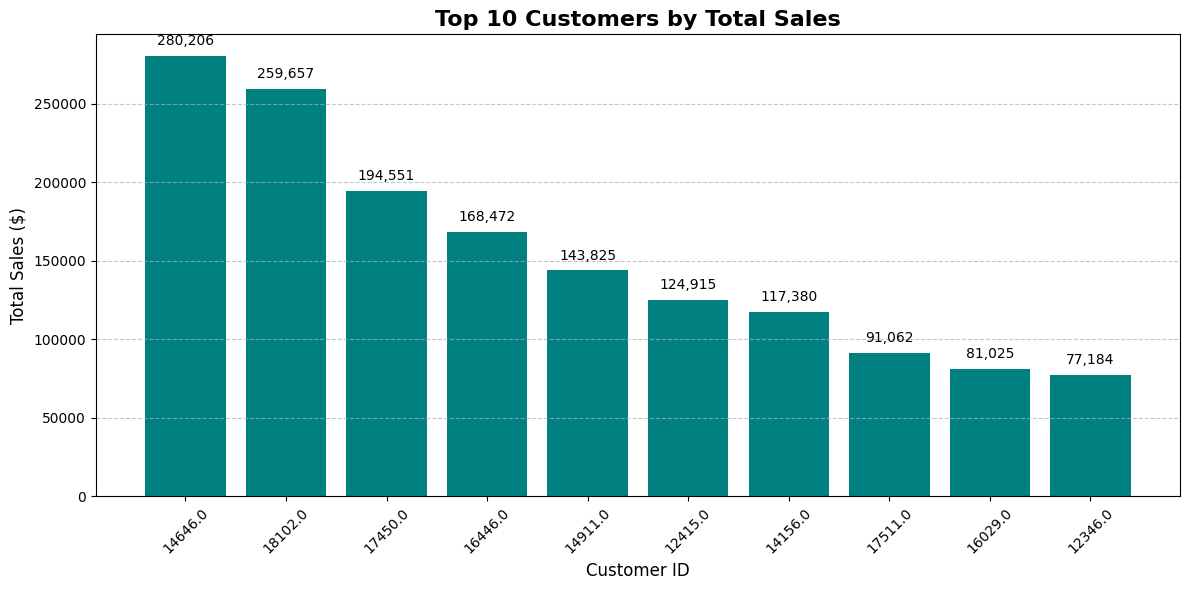

In [17]:
import matplotlib.pyplot as plt

customer_sales = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)
top_customers = customer_sales.head(10)

plt.figure(figsize=(12,6))
bars = plt.bar(top_customers.index.astype(str), top_customers.values, color='teal')

plt.title("Top 10 Customers by Total Sales", fontsize=16, fontweight='bold')
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5000, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



# Top 10 customers ko total sales ko bar graph banako — easily dekhna ko lagi who spent the most #



In [1]:
import pandas as pd

df = pd.read_csv('data.csv', encoding='latin1')  


print(df.head())


print(df.info())


print(df.isnull().sum())


# Data import gareko CSV file bata, ani data ko suru 5 rows, info ra missing value haru check gareko #


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo   

In [2]:

df = df.dropna(subset=['CustomerID'])


df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

print(df.info())


# CustomerID bhayeko row matra rakheko (missing hatako)
# InvoiceDate lai datetime format ma convert gareko
# Quantity ra UnitPrice zero ya negative bhayeko hatayera positive matra rakheko
# Data info herda rows ra columns ko details thahapayeko


<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB
None


Country
United Kingdom    8187806.364
Netherlands        284661.540
EIRE               263276.820
Germany            221698.210
France             197403.900
Australia          137077.270
Switzerland         56385.350
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: TotalSales, dtype: float64


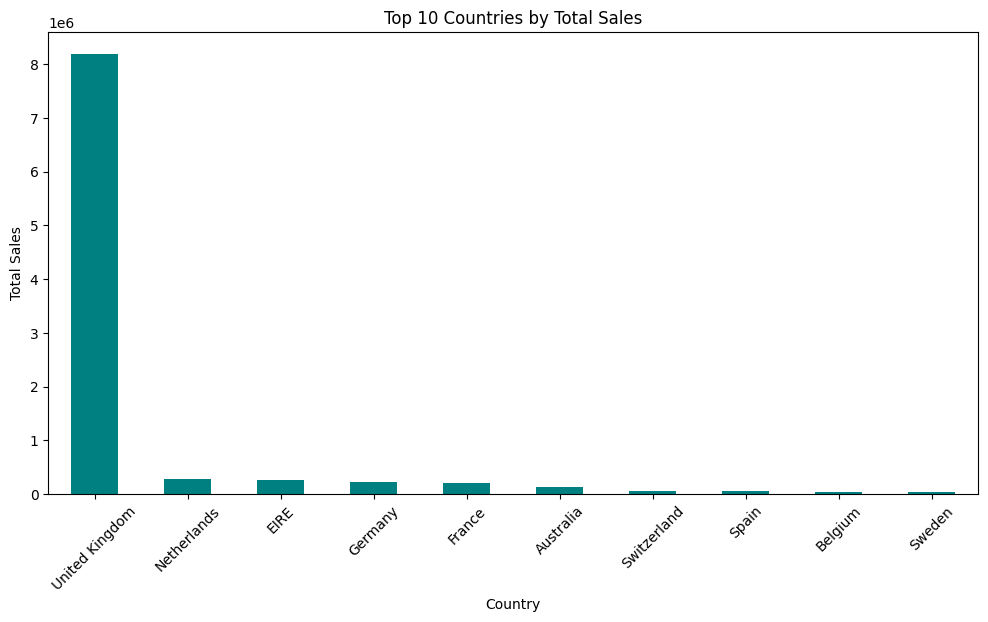

CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
14156.0    113384.14
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
15311.0     59419.34
Name: TotalSales, dtype: float64


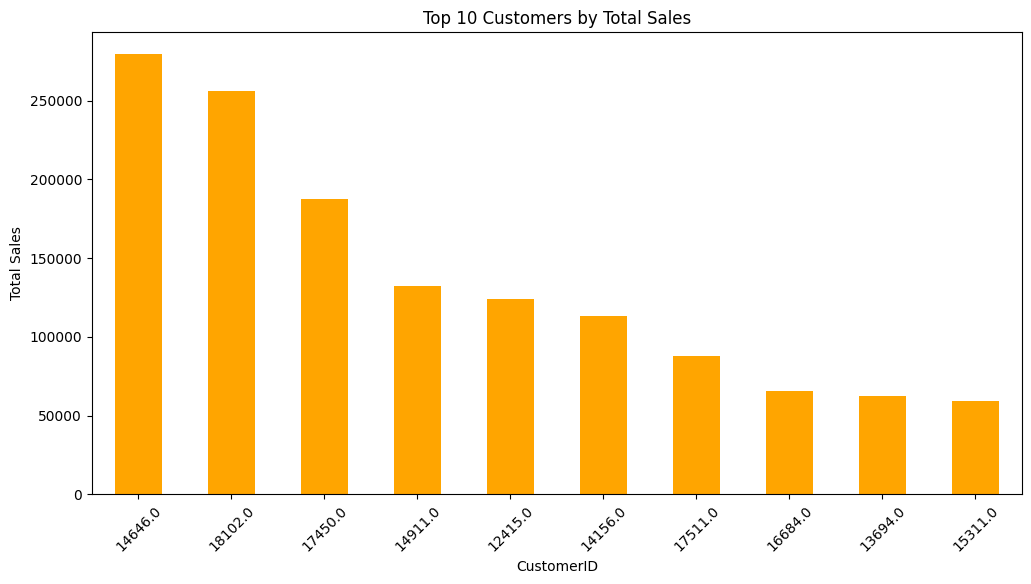

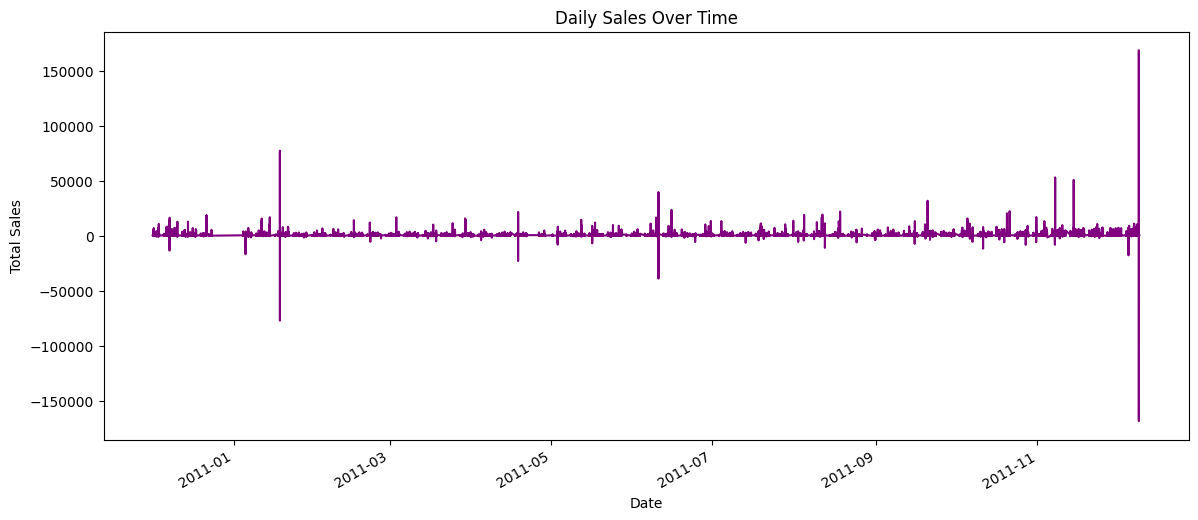

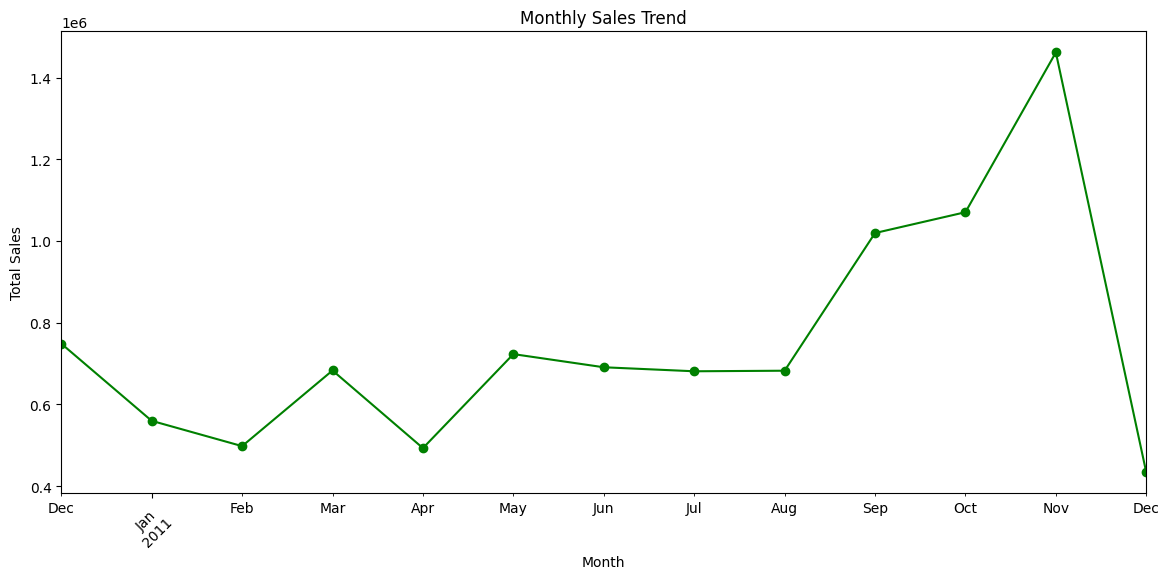

Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
RABBIT NIGHT LIGHT                     66756.59
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
ASSORTED COLOUR BIRD ORNAMENT          58959.73
CHILLI LIGHTS                          53768.06
Name: TotalSales, dtype: float64


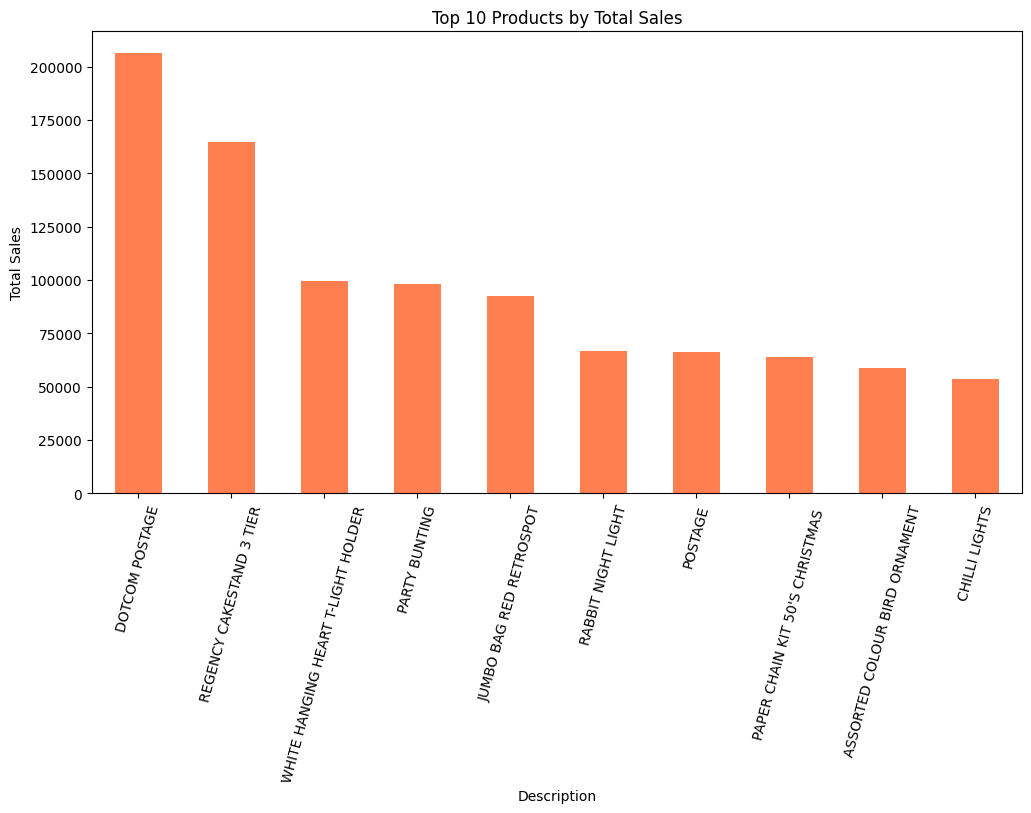

CustomerID
14911.0    248
12748.0    224
17841.0    169
14606.0    128
15311.0    118
13089.0    118
12971.0     89
14527.0     86
13408.0     81
14646.0     77
Name: InvoiceNo, dtype: int64


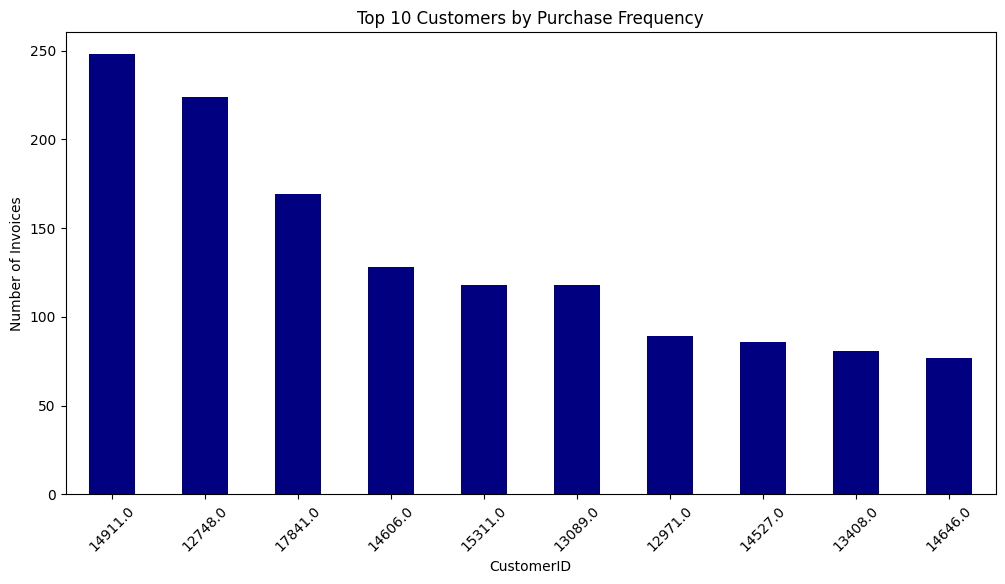

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'InvoiceDate' to datetime first
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Quantity ra UnitPrice multiply gari TotalSales column banayeko
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Country anusar total sales calculate gari, descending order ma top 10 countries print garna
sales_by_country = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
print(sales_by_country.head(10))  

# Top 10 countries ko total sales bar chart ma plot garna
sales_by_country.head(10).plot(kind='bar', figsize=(12,6), color='teal')
plt.title('Top 10 Countries by Total Sales')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.savefig('top_10_countries_sales.png')    # save image here
plt.show()

# Customer ID anusar total sales calculate gari, top 10 customers print garna
sales_by_customer = df.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False)
print(sales_by_customer.head(10))

# Top 10 customers ko sales bar chart ma plot garna
sales_by_customer.head(10).plot(kind='bar', figsize=(12,6), color='orange')
plt.title('Top 10 Customers by Total Sales')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.savefig('top_10_customers_sales.png')    # save image here
plt.show()

# Din ko hisab le total sales calculate garera daily sales trend plot garna
daily_sales = df.groupby('InvoiceDate')['TotalSales'].sum()
daily_sales.plot(figsize=(14,6), color='purple')
plt.title('Daily Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.savefig('daily_sales_over_time.png')    # save image here
plt.show()

# InvoiceDate bata year-month extract gari monthly sales calculate garna
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['TotalSales'].sum()

# Monthly sales ko trend line chart ma plot garna
monthly_sales.plot(kind='line', figsize=(14,6), marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.savefig('monthly_sales_trend.png')    # save image here
plt.show()

# Product description anusar total sales calculate garera top 10 product print garna
top_products = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)
print(top_products)

# Top 10 product ko total sales bar chart ma plot garna
top_products.plot(kind='bar', figsize=(12,6), color='coral')
plt.title('Top 10 Products by Total Sales')
plt.ylabel('Total Sales')
plt.xticks(rotation=75)
plt.savefig('top_10_products_sales.png')    # save image here
plt.show()

# Customer ID anusar kati patak purchase gariyo bhanera calculate garna
purchase_freq = df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)
print(purchase_freq.head(10))

# Top 10 customers ko purchase frequency bar chart ma plot garna
purchase_freq.head(10).plot(kind='bar', figsize=(12,6), color='navy')
plt.title('Top 10 Customers by Purchase Frequency')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45)
plt.savefig('top_10_customers_purchase_frequency.png')    # save image here
plt.show()


In [ ]:
#Bar Graph Analysis of Sales by Country

#I made a bar graph to check my sales data by country. I added up all the sales for each country and then made bars to show those amounts. The bigger the bar, the more that country sold. This makes it really easy to see which countries are selling a lot and which aren’t doing so well. It helps me understand the numbers faster because pictures are easier to get than just numbers. Knowing this is important because it tells us where sales are good or bad, so we can think about how to improve and sell more in the future.



In [5]:
df.to_csv('sales_analysis_cleaned.csv', index=False)
